In [1]:
import keras
from src.utilities import load_data_as_set_of_particles
from src.Models.ParticleCloud import ParticleCloud
from src.Models.MLP import MLP
from src import utilities

#### Loading Data

In [2]:
# Creating the trainning, validation and test set
X_train, y_train = load_data_as_set_of_particles("../Data/HiggsTrainning.csv")
X_val, y_val = load_data_as_set_of_particles("../Data/HiggsValidation.csv")
X_test, y_test = load_data_as_set_of_particles("../Data/HiggsTest.csv")

#### Defining the Model

In [3]:
# Defining the MLP that will be used for all the edges in the cloud
input_mlp = keras.layers.Input(shape=[14])
mlp = MLP(num_neurons=32)
mlp_model = keras.Model(inputs=input_mlp, outputs=mlp(input_mlp))

# creating the ParticleCloud model
input_particle_cloud = keras.layers.Input(shape=[6, 7])
particle_cloud = ParticleCloud(mlp_model, 32)(input_particle_cloud)
output_layer = keras.layers.Dense(2, activation='softmax')(particle_cloud)

# final model
model = keras.Model(inputs=input_particle_cloud, outputs=output_layer)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ particle_cloud (ParticleCloud)  │ (None, 64)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,378 (36.63 KB)

 Trainable params: 9,186 (35.88 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5580 - loss: 0.6799 - val_accuracy: 0.5966 - val_loss: 0.6609
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.6122 - loss: 0.6518 - val_accuracy: 0.6217 - val_loss: 0.6451
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.6222 - loss: 0.6455 - val_accuracy: 0.6293 - val_loss: 0.6395
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6325 - loss: 0.6386 - val_accuracy: 0.6359 - val_loss: 0.6323
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.6367 - loss: 0.6329 - val_accuracy: 0.6359 - val_loss: 0.6288
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6437 - loss: 0.6272 - val_accuracy: 0.6405 - val_loss: 0.6272
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6489 - loss: 0.6254 - val_accuracy: 0.6509 - val_loss: 0.6218
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.6530 -

#### Quick Checks

In [5]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


In [6]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.8210
Precision: 0.6907
Confusion Matrix:
[[17790 12420]
 [ 6049 27741]]
Validation set:
Recall: 0.7986
Precision: 0.6650
Confusion Matrix:
[[4161 3397]
 [1700 6742]]
Test set:
Recall: 0.7919
Precision: 0.6664
Confusion Matrix:
[[5196 4203]
 [2206 8396]]


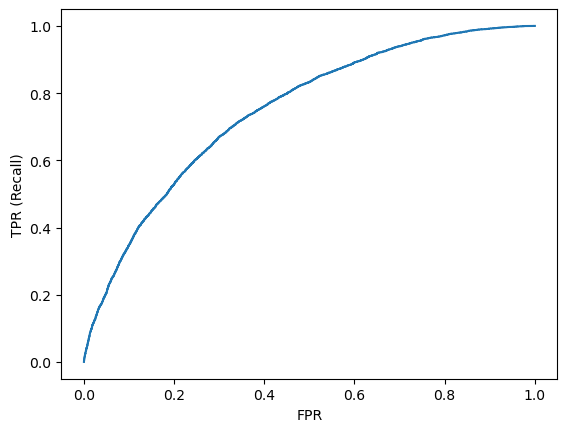

AUC: 0.7486


In [7]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

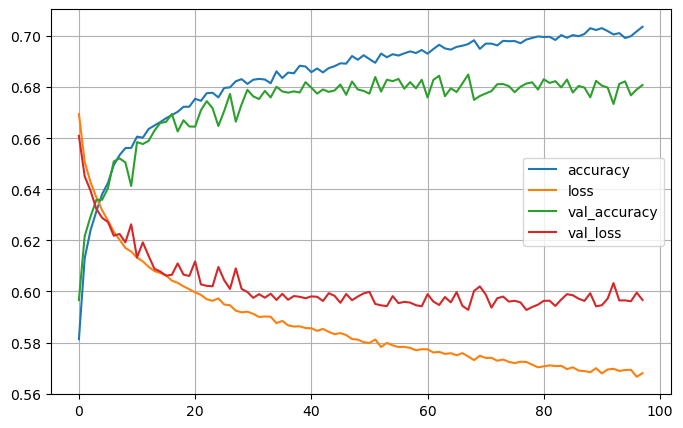

In [8]:
utilities.plot_hist_trainning(history)

In [9]:
utilities.save_model(model, history, "ModelFiles/ParticleCloud")